In [7]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:


# Load the dataset
df = pd.read_csv(r"C:\Users\sukha\Downloads\DATA_SCIENCE\DATASET\Cleaned_DATA.csv")



In [9]:
# --- 1. Data Preparation for Clustering ---
# Drop irrelevant columns and the target variable used for regression
df_clustering = df.drop(columns=['Country', 'Month', 'Reservoir_Water_Storage_BCM'])



In [10]:
# --- 2. Define Features (X) ---
X = df_clustering.copy()

# Identify categorical columns for encoding
categorical_cols = ['State', 'District', 'Reservoir Basin Name', 'Reservoir Name']

# Apply One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [11]:
# --- 3. Feature Scaling (Crucial for K-Means) ---
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform all features
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print(f"Scaled Feature Matrix shape: {X_scaled_df.shape}")

Scaled Feature Matrix shape: (53625, 584)


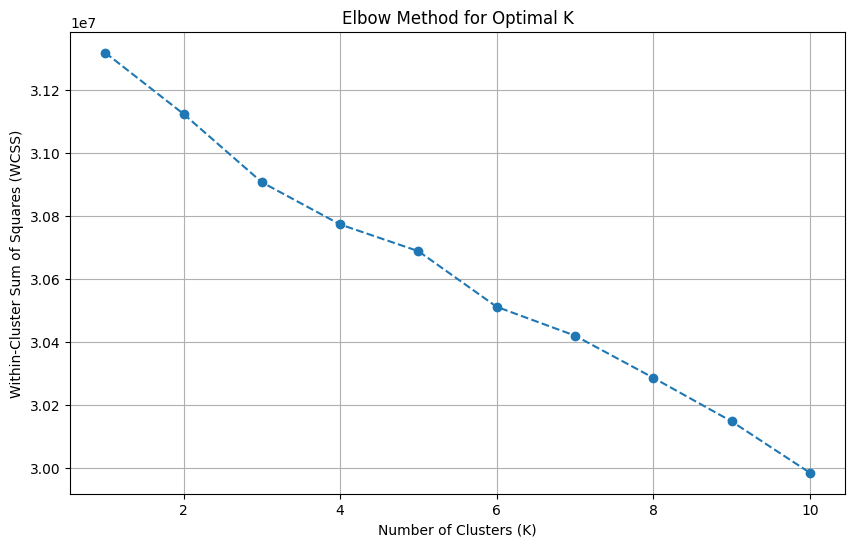

Elbow Method plot generated. Examine the plot to choose the optimal K.


In [ ]:
# --- Calculate WCSS for different values of k ---
wcss = []
k_values = range(1, 11) # Test k from 1 to 10

for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    
    # Fit the model to the scaled data
    kmeans.fit(X_scaled_df)
    
    # Append the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# --- Plot the Elbow Graph ---
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

print("Elbow Method plot generated. Examine the plot to choose the optimal K.")

In [13]:
# --- 1. Initialize K-Means Model with the chosen K ---
# We will use k=4 for demonstration. Adjust based on the Elbow Plot.
k_optimal = 4 
kmeans_model = KMeans(
    n_clusters=k_optimal, 
    init='k-means++', 
    random_state=42, 
    n_init=10, 
    max_iter=300
)

In [14]:
# --- 2. Train and Predict ---
# Fit the model to the scaled data and predict the cluster labels
cluster_labels = kmeans_model.fit_predict(X_scaled_df)

print(f"K-Means Clustering with k={k_optimal} complete.")

K-Means Clustering with k=4 complete.


In [15]:
# --- 3. Add Cluster Labels to Original Data ---
# Add the cluster labels back to the original full DataFrame
df['Cluster'] = cluster_labels

# Display the distribution of records per cluster
print("\nDistribution of Data Points per Cluster:")
print(df['Cluster'].value_counts().sort_index())


Distribution of Data Points per Cluster:
Cluster
0      250
1    24375
2      125
3    28875
Name: count, dtype: int64


In [16]:
# --- 1. Define Numerical Features for Profiling ---
numerical_features = ['Year', 'Full_Reservoir_Capacity_BCM', 'Reservoir_Water_Level_M']


In [17]:

# --- 2. Calculate Mean of Numerical Features by Cluster ---
cluster_profile = df.groupby('Cluster')[numerical_features].mean()



In [18]:
# --- 3. Display Results ---
print("--- Cluster Profiling: Mean Feature Values ---")
print(cluster_profile)



--- Cluster Profiling: Mean Feature Values ---
            Year  Full_Reservoir_Capacity_BCM  Reservoir_Water_Level_M
Cluster                                                               
0        2015.72                     0.920000               312.810520
1        2015.72                    24.829963               121.499599
2        2015.72                   524.860000               114.303200
3        2015.72                    43.666369               259.881974


In [19]:
# Optional: Examine categorical features by finding the mode (most frequent)
# Find the most frequent Reservoir Basin Name for each cluster
basin_mode = df.groupby('Cluster')['Reservoir Basin Name'].agg(lambda x: x.mode()[0])
print("\nMost Frequent Reservoir Basin per Cluster:")
print(basin_mode)


Most Frequent Reservoir Basin per Cluster:
Cluster
0                                                 MAHI
1    WEST FLOWING RIVERS OF KUTCH AND SAURASHTRA IN...
2               WEST FLOWING RIVERS FROM TAPI TO TADRI
3                                               PENNAR
Name: Reservoir Basin Name, dtype: object
